In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_pd = pd.read_csv("train.csv")
test_pd = pd.read_csv("test.csv")

display(train_pd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
survived = train_pd['Survived']
train_pd = train_pd.drop(['Survived'], axis=1)

display(train_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd]).reset_index(drop=True) #For data cleaning and pre-processing

display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Preprocessing of Data



In [5]:
print('NULL values :')
print(combined_pd.isnull().sum()) #Null Values

NULL values :
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


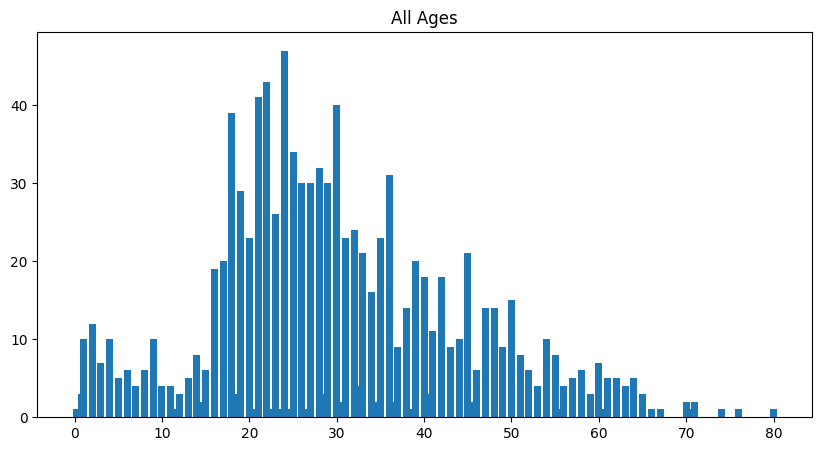

In [6]:
y = combined_pd['Age'].value_counts()
x = y.index.values #Numpy array of values

plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('All Ages')
plt.show()

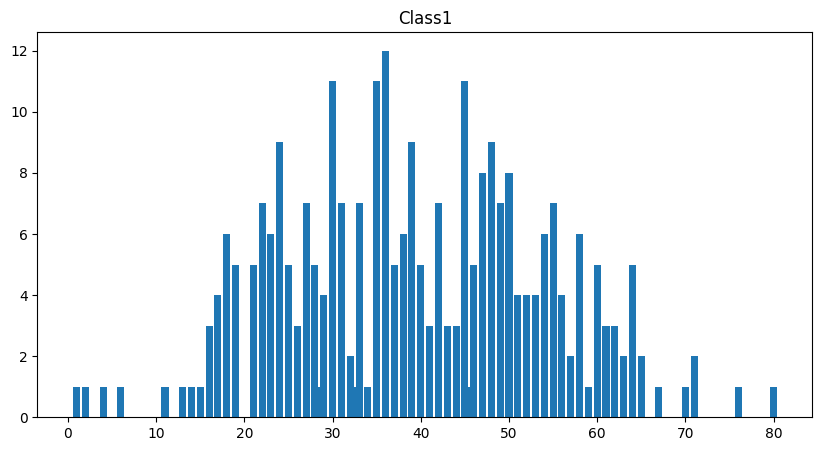

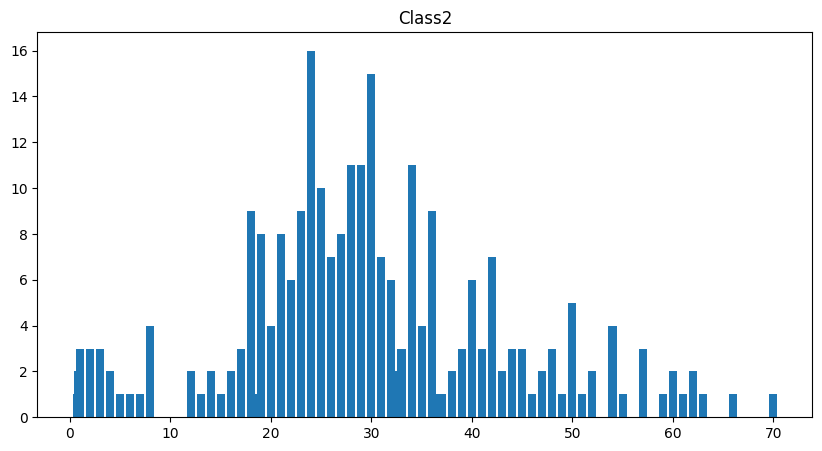

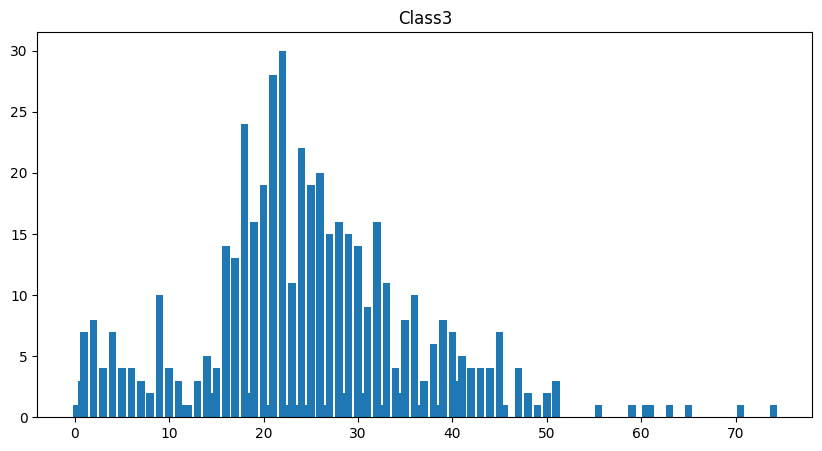

In [7]:
class_age = combined_pd[['Pclass', 'Age']] #Class-wise distribution of age

for i in range(1,4):
    plt.figure(figsize=(10,5))
    plt.title('Class' + str(i))
    y = class_age[class_age['Pclass']==i]['Age'].value_counts()
    x = y.index.values
    plt.bar(x,y)
    plt.show()

In [8]:
medians = class_age.groupby('Pclass').median()
print(medians)

         Age
Pclass      
1       39.0
2       29.0
3       24.0


In [9]:
for i in range(3):
    idx = np.where((combined_pd['Pclass']==i+1) & (combined_pd['Age'].isnull()))[0] #where gives tuple, idx is a numpy array of indices having missing age value for particular class
    combined_pd.loc[idx, 'Age'] = medians.values[i][0]

display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Median:  8.05


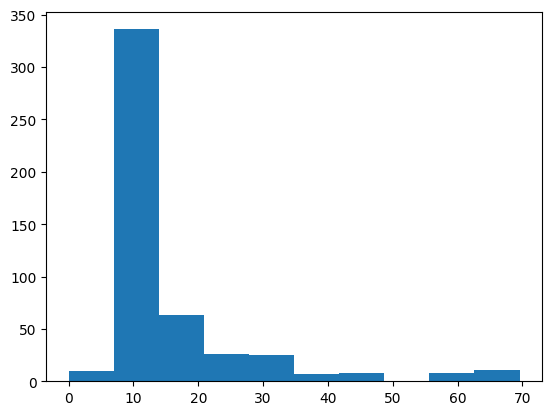

In [10]:
display(combined_pd[combined_pd['Fare'].isnull()])

sim_fares = combined_pd[(combined_pd['Pclass'] == 3) & (combined_pd['Embarked'] == 'S')]['Fare']
print('Median: ', sim_fares.median())

plt.hist(sim_fares)
plt.show()

combined_pd['Fair'] = combined_pd['Fare'].fillna(sim_fares.median())

In [11]:
display(combined_pd[combined_pd['Embarked'].isnull()])

sim_emb = combined_pd[(combined_pd['Pclass'] == 1) & (combined_pd['Fair'] >= 70) & (combined_pd['Fare'] <= 90)]['Embarked']
print(sim_emb.value_counts())
combined_pd['Embarked'] = combined_pd['Embarked'].fillna('C')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fair
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,80.0
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,80.0


Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


In [12]:
combined_pd['Cabin'] = combined_pd['Cabin'].fillna('M')
combined_pd['Cabin'] = combined_pd['Cabin'].str[0]  #Only taking the first letter of each cabin entry

print(combined_pd['Cabin'].value_counts())

idx = np.where(combined_pd['Cabin'] == 'T')[0]
combined_pd.loc[idx, 'Cabin'] = 'M'

Cabin
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [13]:
display(combined_pd)

print(combined_pd.isnull().sum())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fair
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,7.2500
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.9250
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,53.1000
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,8.0500
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,108.9000
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.2500
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,8.0500


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Fair           0
dtype: int64


### Feature Engineering


In [14]:
print(combined_pd.nunique())

print(combined_pd['Pclass'].unique())

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
Fair            281
dtype: int64
[3 1 2]


In [15]:
print(combined_pd['Name'].unique())

names = combined_pd['Name']

last_names = []
titles = []
first_names = []

for name in names:
    if ', ' not in name:
        last_names.append('') 
    else:
        last, name = name.split(', ', 1)
        last_names.append(last)

    if '. ' not in name:
        titles.append('') 
    else:
        title, first = name.split('. ', 1)
        titles.append(title)
        first_names.append(first)

last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)
print('\n')

print(np.unique(titles, return_counts=True))

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']


(array(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype='<U12'), array([  1,   4,   1,   1,   8,   1,   1,   2,  61, 260,   2,   1, 757,
       197,   2,   8,   1,   1], dtype=int64))


In [16]:
idx = np.where(np.isin(titles, ['Capt', 'Col', 'Major']))
titles[idx] = 'Military' #Combines the index into one group and named it Military

idx = np.where(np.isin(titles, ['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'

idx = np.where(np.isin(titles, ['Miss', 'Mlle', 'Ms']))
titles[idx] = 'Ms'

idx = np.where(np.isin(titles, ['Mrs', 'Mme']))
titles[idx] = 'Mrs'

print('\n')
print(np.unique(titles, return_counts=True))

combined_pd['Title'] = titles

display(combined_pd)



(array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12'), array([  8,   7, 757, 198, 264,  67,   8], dtype=int64))


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fair,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,7.2500,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,71.2833,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.9250,Ms
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,53.1000,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.0500,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,8.0500,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,108.9000,Nobility
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.2500,Mr
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,8.0500,Mr


In [17]:
print(combined_pd['Age'].min(), combined_pd['Age'].max())

bins = np.array([0,10,20,30,40,50,60,70,80])

combined_pd['Age_bin'] = pd.cut(combined_pd['Age'], bins) #It divides the Age column into discrete bins defined by the bin array in the range

display(combined_pd)

0.17 80.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fair,Title,Age_bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,7.2500,Mr,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,71.2833,Mrs,"(30, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.9250,Ms,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,53.1000,Mrs,"(30, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.0500,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,8.0500,Mr,"(20, 30]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,108.9000,Nobility,"(30, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.2500,Mr,"(30, 40]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,8.0500,Mr,"(20, 30]"


In [18]:
ticket_dict = dict(combined_pd['Ticket'].value_counts())

combined_pd['tkt_count'] = combined_pd['Ticket'].map(ticket_dict)

display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fair,Title,Age_bin,tkt_count
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,7.2500,Mr,"(20, 30]",1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,71.2833,Mrs,"(30, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.9250,Ms,"(20, 30]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,53.1000,Mrs,"(30, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.0500,Mr,"(30, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,8.0500,Mr,"(20, 30]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,108.9000,Nobility,"(30, 40]",3
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.2500,Mr,"(30, 40]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,8.0500,Mr,"(20, 30]",1


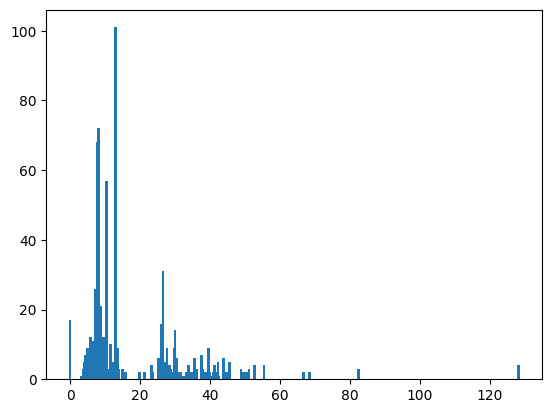

0.0 128.0823


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fair,Title,Age_bin,tkt_count,Fare_per_Ticket,Fare_bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,7.2500,Mr,"(20, 30]",1,7.250000,"(0, 20]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,71.2833,Mrs,"(30, 40]",2,35.641650,"(20, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.9250,Ms,"(20, 30]",1,7.925000,"(0, 20]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,53.1000,Mrs,"(30, 40]",2,26.550000,"(20, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.0500,Mr,"(30, 40]",1,8.050000,"(0, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,8.0500,Mr,"(20, 30]",1,8.050000,"(0, 20]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,108.9000,Nobility,"(30, 40]",3,36.300000,"(20, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.2500,Mr,"(30, 40]",1,7.250000,"(0, 20]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,8.0500,Mr,"(20, 30]",1,8.050000,"(0, 20]"


In [19]:
combined_pd['Fare_per_Ticket'] = combined_pd['Fare']/combined_pd['tkt_count']

plt.bar(combined_pd['Fare_per_Ticket'].value_counts().index.values, combined_pd['Fare_per_Ticket'].value_counts())
plt.show()

print(combined_pd['Fare_per_Ticket'].min(), combined_pd['Fare_per_Ticket'].max())

bins = [0,20,40,60,80,150]
combined_pd['Fare_bin'] = pd.cut(combined_pd['Fare_per_Ticket'], bins)

display(combined_pd)

In [20]:
combined_pd['Num_Family'] = combined_pd['SibSp'] + combined_pd['Parch'] + 1
display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fair,Title,Age_bin,tkt_count,Fare_per_Ticket,Fare_bin,Num_Family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,7.2500,Mr,"(20, 30]",1,7.250000,"(0, 20]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,71.2833,Mrs,"(30, 40]",2,35.641650,"(20, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.9250,Ms,"(20, 30]",1,7.925000,"(0, 20]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,53.1000,Mrs,"(30, 40]",2,26.550000,"(20, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.0500,Mr,"(30, 40]",1,8.050000,"(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,8.0500,Mr,"(20, 30]",1,8.050000,"(0, 20]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,108.9000,Nobility,"(30, 40]",3,36.300000,"(20, 40]",1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.2500,Mr,"(30, 40]",1,7.250000,"(0, 20]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,8.0500,Mr,"(20, 30]",1,8.050000,"(0, 20]",1


In [21]:
combined_pd = combined_pd.drop(['Name', 'Age', 'Ticket', 'Fare', 'tkt_count', 'Fare_per_Ticket'], axis=1)
display(combined_pd)

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Fair,Title,Age_bin,Fare_bin,Num_Family
0,1,3,male,1,0,M,S,7.2500,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,71.2833,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,7.9250,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,53.1000,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,8.0500,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,0,M,S,8.0500,Mr,"(20, 30]","(0, 20]",1
1305,1306,1,female,0,0,C,C,108.9000,Nobility,"(30, 40]","(20, 40]",1
1306,1307,3,male,0,0,M,S,7.2500,Mr,"(30, 40]","(0, 20]",1
1307,1308,3,male,0,0,M,S,8.0500,Mr,"(20, 30]","(0, 20]",1


In [22]:
display(combined_pd)

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Fair,Title,Age_bin,Fare_bin,Num_Family
0,1,3,male,1,0,M,S,7.2500,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,71.2833,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,7.9250,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,53.1000,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,8.0500,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,0,M,S,8.0500,Mr,"(20, 30]","(0, 20]",1
1305,1306,1,female,0,0,C,C,108.9000,Nobility,"(30, 40]","(20, 40]",1
1306,1307,3,male,0,0,M,S,7.2500,Mr,"(30, 40]","(0, 20]",1
1307,1308,3,male,0,0,M,S,8.0500,Mr,"(20, 30]","(0, 20]",1


In [23]:
combined_pd.columns.tolist()


['PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Cabin',
 'Embarked',
 'Fair',
 'Title',
 'Age_bin',
 'Fare_bin',
 'Num_Family']

In [24]:
combined_pd = combined_pd.drop(['Fair'], axis=1)
display(combined_pd)

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_bin,Fare_bin,Num_Family
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1305,1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1306,1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
1307,1308,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1


In [25]:
print(combined_pd.nunique())

PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Parch             8
Cabin             8
Embarked          3
Title             7
Age_bin           8
Fare_bin          5
Num_Family        9
dtype: int64


### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [29]:
combined_pd.set_index('PassengerId', inplace=True)

In [30]:
display(combined_pd)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_bin,Fare_bin,Num_Family
PassengerId,,,,,,,,,,
1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...
1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


In [31]:
from sklearn.preprocessing import LabelEncoder

label_enc = combined_pd.copy()
label_enc = label_enc.astype(str)

label_enc = label_enc.apply(LabelEncoder().fit_transform)

display(label_enc)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age_bin,Fare_bin,Num_Family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,2,1,0,0,7,2,2,2,0,0
1306,0,0,0,0,2,0,5,3,1,0
1307,2,1,0,0,7,2,2,3,0,0


In [40]:
one_hot = label_enc.copy()

one_hot = pd.get_dummies(one_hot, columns=['Sex', 'Embarked', 'Title'])
one_hot = one_hot.astype(int)  #To convert True/False into 1/0

display(one_hot)

,Pclass,SibSp,Parch,Cabin,Age_bin,Fare_bin,Num_Family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,2,0,0,7,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1306,0,0,0,2,3,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1307,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


In [41]:
display(one_hot)
print(one_hot.dtypes)

,Pclass,SibSp,Parch,Cabin,Age_bin,Fare_bin,Num_Family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,0,1,0,0,1,0,0,1,0,0,0,0
2,0,1,0,2,3,1,2,1,0,1,0,0,0,0,0,1,0,0,0
3,2,0,0,7,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0,2,3,1,2,1,0,0,0,1,0,0,0,1,0,0,0
5,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1306,0,0,0,2,3,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1307,2,0,0,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0


Pclass        int32
SibSp         int32
Parch         int32
Cabin         int32
Age_bin       int32
Fare_bin      int32
Num_Family    int32
Sex_0         int32
Sex_1         int32
Embarked_0    int32
Embarked_1    int32
Embarked_2    int32
Title_0       int32
Title_1       int32
Title_2       int32
Title_3       int32
Title_4       int32
Title_5       int32
Title_6       int32
dtype: object


In [43]:
X = one_hot.loc[train_idx].values
y = survived.values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 19) (179, 19) (712,) (179,)


In [44]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train).score(X_test, y_test)

0.7932960893854749

In [49]:
params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'max_samples': [0.8]
}

rand_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=0),
    params,
    n_iter=5,
    scoring='accuracy',
    random_state=0,
    cv=3,
    verbose=2
)

rand_search.fit(X_train, y_train)

print("Best Params:", rand_search.best_params_)
print("Train Acc:", rand_search.best_score_)
print("Test Acc:", accuracy_score(y_test, rand_search.predict(X_test)))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.8, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.8, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, max_samples=0.8, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, max_samples=0.8, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=15, max_features=sqrt, max_samples=0.8, min_samples_split=10, n_estimators=50; total time=   0.

In [48]:
params = {'criterion': ['gini', 'entropy'],
         'n_estimators': [20,50,100.200,300,400,500,800,1000],
         'max_depth': np.arange(3,50),
          'min_samples_split': np.arange(2,1000),
          'max_features': ['sqrt', 'log2'],
          'max_samples': np.linspace(0.1,0.9,10)}

rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=0), params, scoring='accuracy', random_state=0, cv=5, n_iter=10)
rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params, '\n')
print('Train Acc:', rand_search.best_score_)
preds = rand_search.predict(X_test)
print('Test Acc:', accuracy_score(preds, y_test))

{'n_estimators': 300, 'min_samples_split': 6, 'max_samples': 0.6333333333333333, 'max_features': 'sqrt', 'max_depth': 35, 'criterion': 'gini'} 

Train Acc: 0.8201812272234807
Test Acc: 0.8100558659217877


In [ ]:
n+estimators = np.linspace(rand_params['n_estimators']-10, rand_params['n_estimators']+10, 3).astype(int)

min_samples_split = np.arange



params = {'criterion': ['gini', 'entropy'],
         'n_estimators': [20,50,100.200,300,400,500,800,1000],
         'max_depth': np.arange(3,50),
          'min_samples_split': np.arange(2,1000),
          'max_features': ['sqrt', 'log2'],
          'max_samples': np.linspace(0.1,0.9,10)}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), params, scoring='accuracy', random_state=0, cv=5)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, '\n')
print('Train Acc:', grid_search.best_score_)
preds = grid_search.predict(X_test)
print('Test Acc:', accuracy_score(preds, y_test))